<a href="https://colab.research.google.com/github/north-sound-peng/Business-Analytics-Project/blob/main/Predicting%20MegaTelCo%20Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting MegaTelCo Churn

After discussing the churn problem at TelCo with Nadia for a while (remember her?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

In [ ]:
#load important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



**1. Load the churn data [click here to download data](https://drive.google.com/uc?download&id=1xMMPIFOooEzcrdDFNFYvId5aROmTuzxv):**

**Use `get_dummies` to transform the categorical features into dummy features.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/Colab_Notebooks/telco_churn.csv"
df=pd.read_csv(data_path)

df.head()

Mounted at /content/drive


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [ ]:
df = pd.get_dummies(df,
                    columns=['gender', 'Partner', 'Dependents',
                             'PhoneService', 'MultipleLines',
                             'InternetService', 'OnlineSecurity',
                             'OnlineBackup', 'DeviceProtection',
                             'TechSupport', 'StreamingTV',
                             'StreamingMovies', 'Contract',
                             'PaperlessBilling', 'PaymentMethod', 'Churn'],
                    drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,True


__2. _Of course_ normally we would do some detailed exploratory work!  But we have high confidence in the data quality and there are no missing values, so lets proceed.__

__Define X and y and split your data into Training and Test using an 80/20 split (you may consider setting a `random_state` for reproducibility)__

In [ ]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__3. Build the best model you can on the TRAINING set using a decision tree classifier.  We will optimize the hyperparameter `min_samples_leaf` by testing values between 10 and 200 (using a step size of 10), and looking at AUC scores on the TEST set.   Report the best value of the parameter `min_samples_leaf` and the AUC associated with it. Define a model `tree_best` that uses your optimized value of min_samples_leaf.__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

best_auc = -1
best_min_samples_leaf = -1

for min_samples in range(10, 201, 10):
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples, random_state=42)
    tree.fit(X_train, y_train)
    y_pred_proba = tree.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred_proba)
    if auc > best_auc:
        best_auc = auc
        best_min_samples_leaf = min_samples

print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Best AUC: {best_auc}")

tree_best = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf)
tree_best.fit(X_train, y_train)

Best min_samples_leaf: 100
Best AUC: 0.819712845095796


DecisionTreeClassifier(min_samples_leaf=100)

**4. Calculate the feature importances.  For the top 5 most important features, explain whether you think they would be positively or negatively correlated with churn.**

In [ ]:
feature_importances = tree_best.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 most important features:")
print(importance_df.head(5))

Top 5 most important features:
                                 Feature  Importance
1                                 tenure    0.484090
9            InternetService_Fiber optic    0.347384
15  DeviceProtection_No internet service    0.031719
23                     Contract_One year    0.030709
2                         MonthlyCharges    0.025995


1. Tenure: The longer a customer has been with the company, the less likely they are to churn. So, tenure is expected to be negatively correlated with churn.

2. InternetService_Fiber optic: Fiber optic service might lead to churn if there are issues like high costs or network reliability problems. Generally, customers with fiber optic may have higher expectations. This feature could be positively correlated with churn if these customers are dissatisfied.

3. OnlineBackup_No internet service: Since customers are using fewer services, they might be less "sticky" and more prone to churn. This feature would be positively correlated with churn.

4. Contract_One year: Having a one-year contract could suggest a lower likelihood of churn, as these customers are already committed for a longer period. So, Contract_One year is expected to be negatively correlated with churn.

5. MonthlyCharges: Higher monthly charges can be a factor in churn, as customers might look for cheaper alternatives. Therefore, MonthlyCharges would likely be positively correlated with churn.

**5.  Now fit Logistic Regression using Lasso regularization. Test the following values of the shrinkage hyperparameter C:  `C=[0.01,.1,1,10,100]`.  Define a model `lr_best` that uses the best value of C**


In [ ]:
from sklearn.linear_model import LogisticRegression

best_auc = -1
best_c = -1

for c in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(penalty='l1', solver='liblinear', C=c, random_state=42)
    lr.fit(X_train, y_train)
    y_pred_proba = lr.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    if auc > best_auc:
        best_auc = auc
        best_c = c

print(f"Best C: {best_c}")
print(f"Best AUC: {best_auc}")

lr_best = LogisticRegression(penalty='l1', solver='liblinear', C=best_c)
lr_best.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best C: 1
Best AUC: 0.8303976787405978


LogisticRegression(C=1, penalty='l1', solver='liblinear')

**6. Look at the regularized coefficient values in `lr_best`.  Has the Lasso shrunk any of the coefficients down to zero?**

In [ ]:
print(lr_best.coef_)
print(np.where(lr_best.coef_ == 0))

[[ 0.25953926 -0.03483505 -0.00719234 -0.02646873  0.04281549 -0.22928473
  -0.33442979  0.          0.30830898  1.11922308 -0.02304397 -0.0278674
  -0.37022754 -0.0348731  -0.01601715 -0.0277115   0.05903789 -0.02388547
  -0.33226765 -0.76659351  0.37574987 -0.01905406  0.3938635  -0.75100416
  -1.27755717  0.26455142 -0.12807826  0.27113586 -0.01363359]]
(array([0]), array([7]))


Yes, the Lasso regularization has shrunk one coefficient down to zero.

**7.  Use your toolbox!! Now pick a third classification model of your choice. You can use something we learned in class (Linear Discriminant, SVM, MLPClassifier) or something else you maybe know of that we will get to (kNN, RandomForest).  Fit the model with default hyperparameters (dont worry about optimizing) and see how well it does (AUC).**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Random Forest AUC: {auc_rf}")

Random Forest AUC: 0.8115413286673465


__8. Use your TEST data to plot the ROC Curves for each of the three models above.  You will need to use the predicted probabilities from each model applied to the TEST set and the roc_curve() function - make sure to plot the three curves together on the same plot. Use the AUC values from above to identify the best model, and call this `best_model`.__

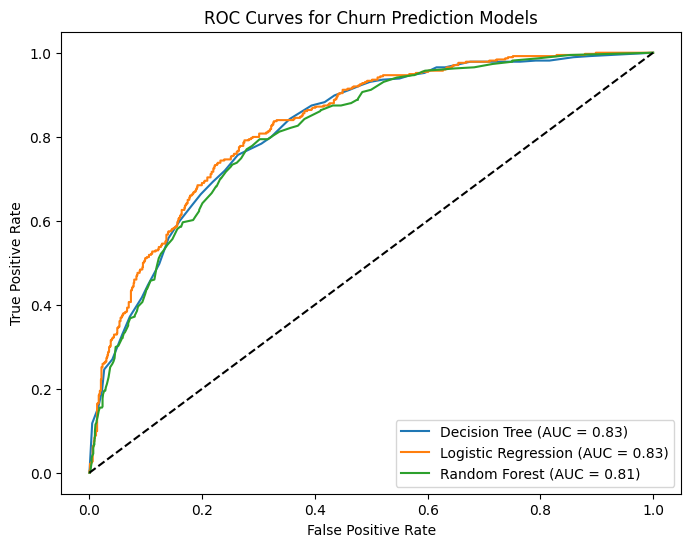

In [ ]:
from sklearn.metrics import roc_curve

# Predict probabilities for each model on the test set
y_pred_proba_tree = tree_best.predict_proba(X_test)[:, 1]
y_pred_proba_lr = lr_best.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {best_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {best_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Churn Prediction Models')
plt.legend(loc='lower right')
plt.show()

# Identify the best model based on AUC
if best_auc > auc_rf:
    if best_auc > best_auc:
      best_model = tree_best
    else:
      best_model = lr_best
else:
  best_model = rf_model

__9. What is the cost / benefit matrix for implementing this model?  HINT: The cost is given in the problem description.  The benefit comes when we make the offer to a customer whose Churn value is 1.  (i.e. they would have left us but we saved them). Remember that everyone who gets the offer takes it.  We can assume the benefit for every customer is the same - equal to the average Customer Charges. Report the benefit as a YEARLY value.__

In [ ]:
# Calculate the average customer charges
avg_monthly_charges = df['MonthlyCharges'].mean()
avg_yearly_charges = avg_monthly_charges * 12

# Cost of the offer
offer_cost = 200

# Calculate net benefit per customer who would churn without the offer
net_benefit_per_churn_customer = avg_yearly_charges - offer_cost

# Construct the matrix as a dictionary for easy reference
cost_benefit_matrix = {
    'True Positive (TP)': f'Benefit - Cost = {net_benefit_per_churn_customer:.2f}',
    'False Positive (FP)': f'Cost only = -{offer_cost}',
    'False Negative (FN)': '0 (lost opportunity)',
    'True Negative (TN)': '0 (no cost or benefit)'
}

# Display results
print("Average Monthly Charge:", avg_monthly_charges)
print("Yearly Benefit per Customer:", avg_yearly_charges)
print("Cost-Benefit Matrix:", cost_benefit_matrix)

Average Monthly Charge: 64.79820819112628
Yearly Benefit per Customer: 777.5784982935154
Cost-Benefit Matrix: {'True Positive (TP)': 'Benefit - Cost = 577.58', 'False Positive (FP)': 'Cost only = -200', 'False Negative (FN)': '0 (lost opportunity)', 'True Negative (TN)': '0 (no cost or benefit)'}


__10. Using `best_model` -  along with the costs and benefits - now we want to look at profit.  Plot a *PROFIT CURVE* that shows the overall profit at different levels of marketing.  You'll need to sort the threshold probabilities, and calculate the profit at each threshold by determining who you market to and who you dont.  Use your cost/benefit numbers to calculate total profit at each threshold value.__

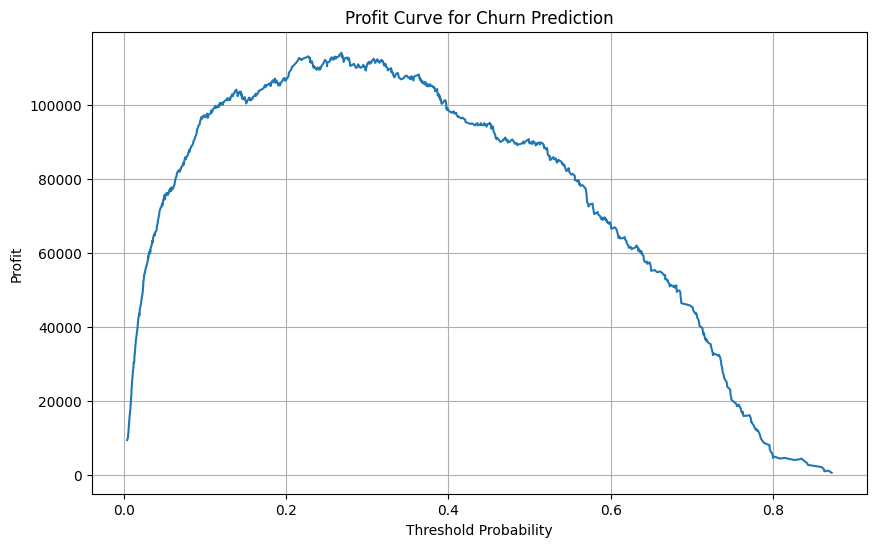

In [ ]:
# Predict churn probabilities for the test set using the best model
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calculate the average customer charges
avg_monthly_charges = df['MonthlyCharges'].mean()
avg_yearly_charges = avg_monthly_charges * 12

# Cost of the offer
offer_cost = 200

# Calculate net benefit per customer who would churn without the offer
net_benefit_per_churn_customer = avg_yearly_charges - offer_cost

# Sort customers by predicted churn probability in descending order
thresholds = np.sort(y_pred_proba_best)

profits = []
for threshold in thresholds:
    # Determine who to market to based on the current threshold
    predictions = y_pred_proba_best >= threshold

    # Calculate the benefit and cost for the target customers
    TP = sum((predictions == 1) & (y_test == 1))
    FP = sum((predictions == 1) & (y_test == 0))

    # Calculate the profit at the current threshold
    profit =(TP * net_benefit_per_churn_customer) - (FP * offer_cost)
    profits.append(profit)

# Plot the profit curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, profits)
plt.xlabel('Threshold Probability')
plt.ylabel('Profit')
plt.title('Profit Curve for Churn Prediction')
plt.grid(True)
plt.show()

**11. Recall that Nadia told you there is only budget to market to the top 25% of customers.  Make a pitch to her for altering that decision based on your Profit curve.  How much do you recommend marketing to, and how much money will it make compared to her threshold?**

In [ ]:
# Find the maximum profit and its corresponding threshold
max_profit = max(profits)
max_profit_index = profits.index(max_profit)
optimal_threshold = thresholds[max_profit_index]

# Calculate the 75th percentile threshold for the top 25% of customers
top_25_threshold = np.percentile(y_pred_proba_best, 75)

# Calculate profit at Nadia's 25% threshold
predictions_top_25 = y_pred_proba_best >= top_25_threshold
TP_top_25 = sum((predictions_top_25 == 1) & (y_test == 1))  # True positives for top 25%
FP_top_25 = sum((predictions_top_25 == 1) & (y_test == 0))  # False positives for top 25%
nadia_profit = (TP_top_25 * net_benefit_per_churn_customer) - (FP_top_25 * offer_cost)

# Results to pitch to Nadia
profit_difference = max_profit - nadia_profit

print(f"Top 25% Threshold: {top_25_threshold:.2f}")
print(f"Nadia's 25% threshold profit: ${nadia_profit:.2f}")
print(f"Optimal Threshold for Maximum Profit: {optimal_threshold:.2f}")
print(f"Maximum achievable profit: ${max_profit:.2f}")
print(f"Profit Difference if Adjusted: {profit_difference:.2f}")

Top 25% Threshold: 0.46
Nadia's 25% threshold profit: $93669.06
Optimal Threshold for Maximum Profit: 0.27
Maximum achievable profit: $114163.24
Profit Difference if Adjusted: 20494.17


Based on the analysis, I recommend adjusting the marketing threshold to 0.27, which targets a larger portion of customers than Nadia's top 25% threshold of 0.46. This adjustment is projected to maximize profit, yielding a total profit of 114,163.24 dollars, compared to the $93,669.06 profit at Nadia's 25% threshold.


__12. Assume Nadia was persuaded by your pitch and this model was deployed - and it performed as expected.  Now it is performance review season, and you are looking for a raise!!
Estimate the amount of money you made for the company by using your model.  Compare your profit above against a "dumb" model of marketing to the same amount of customers in the Test set who are selected randomly. (Hint: you can use a random number generator to pick customers at random to market to, and see what their profit would be).   Scale your results up to the overall consumer base of 100,000 customers to make your case.__

In [ ]:
#Set parameters based on the company information
total_customers = 100000
test_size_ratio = len(y_test) / (len(y_train) + len(y_test))

# Calculate the profit with the optimized model (already known from previous results)
profit_optimized_model = max_profit

# Simulate the profit of a "dumb" model that randomly markets to the same number of customers as the optimized model
np.random.seed(42)
random_predictions = np.random.rand(len(y_test)) < optimal_threshold

# Calculate True Positives (TP) and False Positives (FP) for the random model
TP_random = sum((random_predictions == 1) & (y_test == 1))
FP_random = sum((random_predictions == 1) & (y_test == 0))
profit_random_model = (TP_random * net_benefit_per_churn_customer) - (FP_random * offer_cost)

# Scale profits up to the full customer base
scaled_profit_optimized = profit_optimized_model * (total_customers / len(y_test))
scaled_profit_random = profit_random_model * (total_customers / len(y_test))

# Calculate the difference in profits between the optimized model and the random model
profit_difference_scaled = scaled_profit_optimized - scaled_profit_random

print("Scaled Profit with Optimized Model:", scaled_profit_optimized)
print("Scaled Profit with Random Model:", scaled_profit_random)
print("Additional Profit Generated by Optimized Model:", profit_difference_scaled)

Scaled Profit with Optimized Model: 8113947.085634723
Scaled Profit with Random Model: 671211.7132523631
Additional Profit Generated by Optimized Model: 7442735.3723823605


__13 (Extra Credit).  In the above exercise we assumed the benefit of each customer was the same.  But it would be even better to incorporate each customer's individual spending in the cost/benefit!! Calculate an *individualized expected value* for profit/loss for _each customer_ using their specific Monthly Charges and their calculated probability of churn.    Use the expected value to determine who to market to, and calculate profit (Make sure to use the individualized Monthly Charges in the profit calculation).  Are the results any better?__

In [ ]:
# Calculate individualized expected profit/loss for each customer using their specific Monthly Charges and churn probability
monthly_charges_test = X_test['MonthlyCharges']
yearly_charges_test = monthly_charges_test * 12

# Individualized expected values
expected_profits = []

for prob, yearly_benefit in zip(y_pred_proba_best, yearly_charges_test):
    # Calculate expected net benefit per customer based on probability of churn and individualized yearly benefit
    expected_net_benefit = (prob * (yearly_benefit - offer_cost)) - ((1 - prob) * offer_cost)
    expected_profits.append(expected_net_benefit)

# Determine the total profit by marketing only to customers with a positive expected profit
total_individualized_profit = sum(profit for profit in expected_profits if profit > 0)

print("Total Profit with Individualized Expected Values:", total_individualized_profit)

Total Profit with Individualized Expected Values: 173263.77799081925


The maximum achievable profit in the above case is $114163.24, which is lower than profit with individualized expected values.This may be because when calculating individualized expected values, each customer's specific monthly charges and individual churn probability are taken into account. This approach maximizes profit by considering each customer's unique potential benefit rather than applying a fixed threshold to a group.

**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**
